# Tumor detection using Fuzzy C Means (FCM) :

- This method is inspired by the k-means algorithm, but it is more precise in the sense that it uses Fuzzy set theory. In its original form it is an unsupervised technique that realizes clustering. In this practical work we do the initialization using two thresholds to split the color histogram in three classes. This method assures convergence. But it has a big computational time and it may be sensitive to initial conditions and to noise int he image. With this method we have that the tumor has shrunk by 6.23%.

- Cette méthode s'inspire de l'algorithme k-means, elle utilise la notion de flou venant de la théorie de la logique floue, ou un pixel peut appartenir à plusieurs classes au même temps avec différentes probabilités ...  Dans ce TP nous avons initialité cette méthode à l'aide de deux seuils sur l'échelle de gris pour obtenir trois classes : le fond, le cerveau et la tumeur. C'est une méthode dans sa forme originale non supervisée, cependant le temps de calcul peut être assez conséquent pour de grandes dimensions. Finalement nous avons obtenu que la tumeur a rétréci de 6.23%.

In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from skimage import measure
from collections import Counter

## Loading medical images

In [2]:
IRMcoupe17_t1 = Image.open('./images/IRMcoupe17-t1.jpg')
IRMcoupe17_t2 = Image.open('./images/IRMcoupe17-t2.jpg')

IRMcoupe17_t1 = np.array(IRMcoupe17_t1)
IRMcoupe17_t2 = np.array(IRMcoupe17_t2)

## Visualizing the images

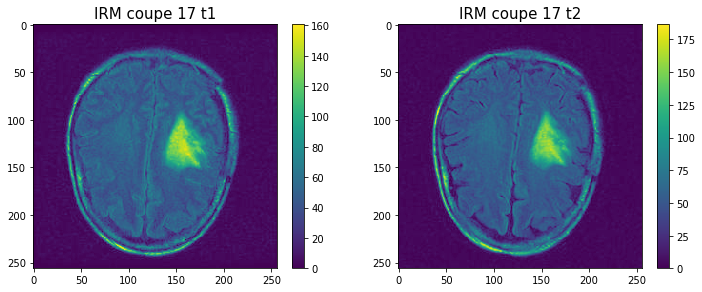

In [3]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.imshow(IRMcoupe17_t1)
plt.title('IRM coupe 17 t1', fontsize=15)
plt.colorbar(shrink=0.9)

plt.subplot(1, 2, 2)
plt.imshow(IRMcoupe17_t2)
plt.title('IRM coupe 17 t2', fontsize=15)
plt.colorbar(shrink=0.9)

plt.show()

## Visualization of the histograms

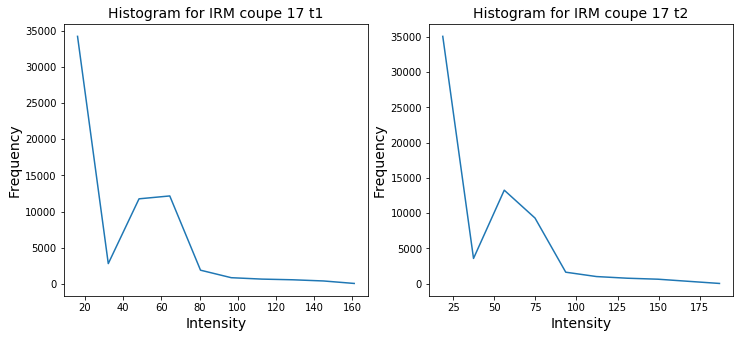

In [4]:
frequencies1, intensities1 = np.histogram(IRMcoupe17_t1)
frequencies2, intensities2 = np.histogram(IRMcoupe17_t2)

# Make both arrays of the same size
intensities1 = intensities1[1:]
intensities2 = intensities2[1:]

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(intensities1, frequencies1)
plt.title("Histogram for IRM coupe 17 t1", fontsize=14)
plt.xlabel("Intensity", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(intensities2, frequencies2)
plt.title("Histogram for IRM coupe 17 t2", fontsize=14)
plt.xlabel("Intensity", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.show()

## FCM : Initialization Phase using two thresholds

In [5]:
threshold1 = 10
threshold2 = 50


###### Initialization : Old MRI   ######
########################################

# membership matrices
mu_1 = np.zeros(IRMcoupe17_t1.shape)
mu_2 = np.zeros(IRMcoupe17_t1.shape)
mu_3 = np.zeros(IRMcoupe17_t1.shape)

mu_1[IRMcoupe17_t1 <= threshold1] = 1
mu_3[IRMcoupe17_t1 >= threshold2] = 1

mu_2[IRMcoupe17_t1 > threshold1]   = 1
mu_2[IRMcoupe17_t1 >= threshold2]  = 0


# Three kind of pixels initialization
part_1 = np.zeros(IRMcoupe17_t1.shape)
part_2 = np.zeros(IRMcoupe17_t1.shape)
part_3 = np.zeros(IRMcoupe17_t1.shape)

part_1[mu_1 == 1] = IRMcoupe17_t1[mu_1 == 1]
part_2[mu_2 == 1] = IRMcoupe17_t1[mu_2 == 1]
part_3[mu_3 == 1] = IRMcoupe17_t1[mu_3 == 1]

mean_1 = np.mean(IRMcoupe17_t1[mu_1 == 1])
mean_2 = np.mean(IRMcoupe17_t1[mu_2 == 1])
mean_3 = np.mean(IRMcoupe17_t1[mu_3 == 1])


###### Initialization : Last MRI   ######
########################################

# membership matrices
mu_1_last = np.zeros(IRMcoupe17_t2.shape)
mu_2_last = np.zeros(IRMcoupe17_t2.shape)
mu_3_last = np.zeros(IRMcoupe17_t2.shape)

mu_1_last[IRMcoupe17_t2 <= threshold1] = 1
mu_3_last[IRMcoupe17_t2 >= threshold2] = 1

mu_2_last[IRMcoupe17_t2 > threshold1] = 1
mu_2_last[IRMcoupe17_t2 >= threshold2]  = 0


# Three kind of pixels initialization
part_1_last = np.zeros(IRMcoupe17_t1.shape)
part_2_last = np.zeros(IRMcoupe17_t1.shape)
part_3_last = np.zeros(IRMcoupe17_t1.shape)

part_1_last[mu_1_last == 1] = IRMcoupe17_t2[mu_1_last == 1]
part_2_last[mu_2_last == 1] = IRMcoupe17_t2[mu_2_last == 1]
part_3_last[mu_3_last == 1] = IRMcoupe17_t2[mu_3_last == 1]

mean_1_last = np.mean(IRMcoupe17_t2[mu_1_last == 1])
mean_2_last = np.mean(IRMcoupe17_t2[mu_2_last == 1])
mean_3_last = np.mean(IRMcoupe17_t2[mu_3_last == 1])

print('Old RMI Initialization for the centroids :')
print('Mean background : ', mean_1)
print('Mean middle     : ', mean_2)
print('Mean tumor      : ', mean_3)

print()
print('Last RMI Initialization for the centroids :')
print('Mean background : ', mean_1_last)
print('Mean middle     : ', mean_2_last)
print('Mean tumor      : ', mean_3_last)

Old RMI Initialization for the centroids :
Mean background :  3.8744167845639805
Mean middle     :  38.42354202656818
Mean tumor      :  66.23390005151984

Last RMI Initialization for the centroids :
Mean background :  3.8106378545703485
Mean middle     :  35.24986020503262
Mean tumor      :  68.58720354566458


In [6]:
## Checking that there is no overlap ...
## For each pixel  mu1 + mu2 + mu3 must be equal to 1!
if IRMcoupe17_t1.shape[0] * IRMcoupe17_t1.shape[1] == np.sum(mu_1 + mu_2 + mu_3):
    print('Before : OK')

if IRMcoupe17_t2.shape[0] * IRMcoupe17_t2.shape[1] == np.sum(mu_1_last + mu_2_last + mu_3_last):
    print('After : OK')
    

Before : OK
After : OK


## Visualization of the initialization

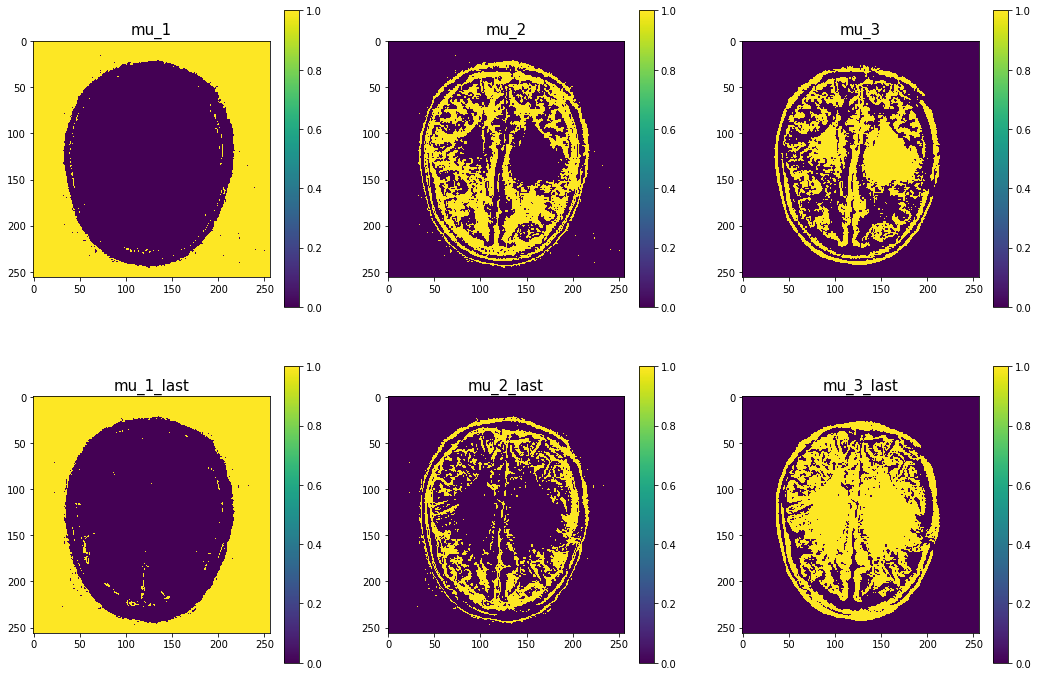

In [7]:
plt.figure(figsize=(18,12))

plt.subplot(2, 3, 1)
plt.imshow(mu_1)
plt.title('mu_1', fontsize=15)
plt.colorbar()

plt.subplot(2, 3, 2)
plt.imshow(mu_2)
plt.title('mu_2', fontsize=15)
plt.colorbar()

plt.subplot(2, 3, 3)
plt.imshow(mu_3)
plt.title('mu_3', fontsize=15)
plt.colorbar()

plt.subplot(2, 3, 4)
plt.imshow(mu_1_last)
plt.title('mu_1_last', fontsize=15)
plt.colorbar()

plt.subplot(2, 3, 5)
plt.imshow(mu_2_last)
plt.title('mu_2_last', fontsize=15)
plt.colorbar()

plt.subplot(2, 3, 6)
plt.imshow(mu_3_last)
plt.title('mu_3_last', fontsize=15)
plt.colorbar()

plt.show()

## Definition of the cost function

In [8]:
def J_cost_function(mu_1, mu_2, mu_3, mean_1, mean_2, mean_3, data, m=2):
    J = 0
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            J += mu_1[i,j]**m * (data[i,j] - mean_1)**2
            J += mu_2[i,j]**m * (data[i,j] - mean_2)**2
            J += mu_3[i,j]**m * (data[i,j] - mean_3)**2
    return J

## 100 Iteration : First MRI

In [9]:
m = 2
p = 2/(m - 1)

W = range(IRMcoupe17_t1.shape[1])
H = range(IRMcoupe17_t1.shape[0])

J_Old = 10*5
J_New = 10*1

for k in range(100):
    # Centroid 1
    numerator1 = sum([mu_1[i,j]**m * IRMcoupe17_t1[i,j] for i in H for j in W])
    denominator1 = sum([mu_1[i,j]**m for i in H for j in W])
    mean_1 = numerator1 / denominator1
    
    # Centroid 2
    numerator2 = sum([mu_2[i,j]**m * IRMcoupe17_t1[i,j] for i in H for j in W])
    denominator2 = sum([mu_2[i,j]**m for i in H for j in W])
    mean_2 = numerator2 / denominator2
    
    # Centroid 3
    numerator3 = sum([mu_3[i,j]**m * IRMcoupe17_t1[i,j] for i in H for j in W])
    denominator3 = sum([mu_3[i,j]**m for i in H for j in W])
    mean_3 = numerator3 / denominator3
    
    #print('Mean background iteration {} : '.format(k), mean_1)
    #print('Mean middle     iteration {} : '.format(k), mean_2)
    #print('Mean tumor      iteration {} : '.format(k), mean_3)    
    #print()
    
    for i in W:
        for j in H:
            
            d1 = abs(IRMcoupe17_t1[i,j] - mean_1)
            d2 = abs(IRMcoupe17_t1[i,j] - mean_2)
            d3 = abs(IRMcoupe17_t1[i,j] - mean_3)
            
            mu_1[i,j] = 1/((d1/d1)**p + (d1/d2)**p + (d1/d3)**p)
            mu_2[i,j] = 1/((d2/d1)**p + (d2/d2)**p + (d2/d3)**p)
            mu_3[i,j] = 1/((d3/d1)**p + (d3/d2)**p + (d3/d3)**p)
            
            # print(mu_1[i,j] + mu_2[i,j] + mu_3[i,j])
    
    J_Old = J_New
    J_New = J_cost_function(mu_1, mu_2, mu_3, mean_1, mean_2, mean_3, IRMcoupe17_t1)
    
    print('Loss at iteration {} :\t{}'.format(k, J_New))
    
    # Stop criterion : Small change in the coste function
    if abs(J_Old - J_New) < 0.1:
        break
    

Loss at iteration 0 :	5317101.284464798
Loss at iteration 1 :	4836718.607261147
Loss at iteration 2 :	4571351.544039354
Loss at iteration 3 :	4306719.937891248
Loss at iteration 4 :	4017634.849736744
Loss at iteration 5 :	3734464.1859422764
Loss at iteration 6 :	3513978.3932585865
Loss at iteration 7 :	3383045.931051683
Loss at iteration 8 :	3321537.1766827274
Loss at iteration 9 :	3297095.411167374
Loss at iteration 10 :	3288368.4624124872
Loss at iteration 11 :	3285446.251254453
Loss at iteration 12 :	3284503.4830776434
Loss at iteration 13 :	3284205.693224285
Loss at iteration 14 :	3284112.744713463
Loss at iteration 15 :	3284083.9256095253
Loss at iteration 16 :	3284075.023266498
Loss at iteration 17 :	3284072.278975499
Loss at iteration 18 :	3284071.4339729124
Loss at iteration 19 :	3284071.1739535443
Loss at iteration 20 :	3284071.0939690312


## 100 Iteration : Last MRI

In [10]:
m = 2
p = 2/(m - 1)

W = range(IRMcoupe17_t2.shape[1])
H = range(IRMcoupe17_t2.shape[0])

J_Old = 10*5
J_New = 10*1

for k in range(100):
    # Centroid 1
    numerator1 = sum([mu_1_last[i,j]**m * IRMcoupe17_t2[i,j] for i in H for j in W])
    denominator1 = sum([mu_1_last[i,j]**m for i in H for j in W])
    mean_1_last = numerator1 / denominator1
    
    # Centroid 2
    numerator2 = sum([mu_2_last[i,j]**m * IRMcoupe17_t2[i,j] for i in H for j in W])
    denominator2 = sum([mu_2_last[i,j]**m for i in H for j in W])
    mean_2_last = numerator2 / denominator2
    
    # Centroid 3
    numerator3 = sum([mu_3_last[i,j]**m * IRMcoupe17_t2[i,j] for i in H for j in W])
    denominator3 = sum([mu_3_last[i,j]**m for i in H for j in W])
    mean_3_last = numerator3 / denominator3
    
    #print('Mean background iteration {} : '.format(k), mean_1)
    #print('Mean middle     iteration {} : '.format(k), mean_2)
    #print('Mean tumor      iteration {} : '.format(k), mean_3)    
    #print()
    
    for i in W:
        for j in H:
            
            d1 = abs(IRMcoupe17_t2[i,j] - mean_1_last)
            d2 = abs(IRMcoupe17_t2[i,j] - mean_2_last)
            d3 = abs(IRMcoupe17_t2[i,j] - mean_3_last)
            
            mu_1_last[i,j] = 1/((d1/d1)**p + (d1/d2)**p + (d1/d3)**p)
            mu_2_last[i,j] = 1/((d2/d1)**p + (d2/d2)**p + (d2/d3)**p)
            mu_3_last[i,j] = 1/((d3/d1)**p + (d3/d2)**p + (d3/d3)**p)
            
            # print(mu_1[i,j] + mu_2[i,j] + mu_3[i,j])
    
    J_Old = J_New
    J_New = J_cost_function(mu_1_last, mu_2_last, mu_3_last, mean_1_last, mean_2_last, mean_3_last, IRMcoupe17_t2)
    
    print('Loss at iteration {:>3} :\t{:9.2f}'.format(k, J_New))
    
    # Stop criterion : Small change in the coste function
    if abs(J_Old - J_New) < 0.1:
        break
    

Loss at iteration   0 :	8046006.72
Loss at iteration   1 :	7244444.12
Loss at iteration   2 :	6705927.85
Loss at iteration   3 :	6225932.11
Loss at iteration   4 :	5713194.81
Loss at iteration   5 :	5155011.66
Loss at iteration   6 :	4658877.46
Loss at iteration   7 :	4341706.35
Loss at iteration   8 :	4189701.46
Loss at iteration   9 :	4129639.64
Loss at iteration  10 :	4108531.45
Loss at iteration  11 :	4101599.29
Loss at iteration  12 :	4099408.14
Loss at iteration  13 :	4098730.18
Loss at iteration  14 :	4098522.90
Loss at iteration  15 :	4098459.93
Loss at iteration  16 :	4098440.87
Loss at iteration  17 :	4098435.12
Loss at iteration  18 :	4098433.38
Loss at iteration  19 :	4098432.86
Loss at iteration  20 :	4098432.70
Loss at iteration  21 :	4098432.65


## Pixel extraction according to the results of the FCM

In [11]:
part_1 = np.zeros(IRMcoupe17_t1.shape)
part_2 = np.zeros(IRMcoupe17_t1.shape)
part_3 = np.zeros(IRMcoupe17_t1.shape)

part_1_last = np.zeros(IRMcoupe17_t2.shape)
part_2_last = np.zeros(IRMcoupe17_t2.shape)
part_3_last = np.zeros(IRMcoupe17_t2.shape)

for i in range(IRMcoupe17_t1.shape[0]):
    for j in range(IRMcoupe17_t1.shape[1]):
        if mu_1[i,j] >= mu_2[i,j] and mu_1[i,j] >= mu_3[i,j]:
            part_1[i,j] = IRMcoupe17_t1[i,j]
        if mu_2[i,j] >= mu_1[i,j] and mu_2[i,j] >= mu_3[i,j]:
            part_2[i,j] = IRMcoupe17_t1[i,j]
        if mu_3[i,j] >= mu_1[i,j] and mu_3[i,j] >= mu_2[i,j]:
            part_3[i,j] = IRMcoupe17_t1[i,j]

for i in range(IRMcoupe17_t2.shape[0]):
    for j in range(IRMcoupe17_t2.shape[1]):
        if mu_1_last[i,j] >= mu_2_last[i,j] and mu_1_last[i,j] >= mu_3_last[i,j]:
            part_1_last[i,j] = IRMcoupe17_t2[i,j]
        if mu_2_last[i,j] >= mu_1_last[i,j] and mu_2_last[i,j] >= mu_3_last[i,j]:
            part_2_last[i,j] = IRMcoupe17_t2[i,j]
        if mu_3_last[i,j] >= mu_1_last[i,j] and mu_3_last[i,j] >= mu_2_last[i,j]:
            part_3_last[i,j] = IRMcoupe17_t2[i,j]

## Visualization of the membership matrices

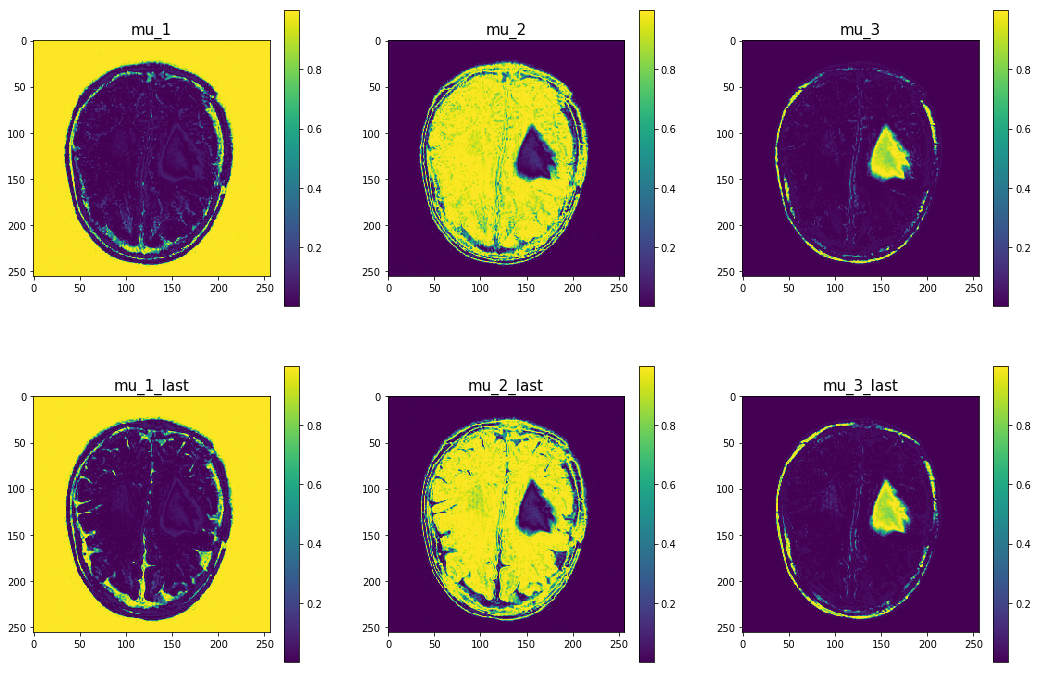

In [12]:
plt.figure(figsize=(18,12))

plt.subplot(2, 3, 1)
plt.imshow(mu_1)
plt.title('mu_1', fontsize=15)
plt.colorbar()

plt.subplot(2, 3, 2)
plt.imshow(mu_2)
plt.title('mu_2', fontsize=15)
plt.colorbar()

plt.subplot(2, 3, 3)
plt.imshow(mu_3)
plt.title('mu_3', fontsize=15)
plt.colorbar()

plt.subplot(2, 3, 4)
plt.imshow(mu_1_last)
plt.title('mu_1_last', fontsize=15)
plt.colorbar()

plt.subplot(2, 3, 5)
plt.imshow(mu_2_last)
plt.title('mu_2_last', fontsize=15)
plt.colorbar()

plt.subplot(2, 3, 6)
plt.imshow(mu_3_last)
plt.title('mu_3_last', fontsize=15)
plt.colorbar()

plt.show()

## Visualization after FCM

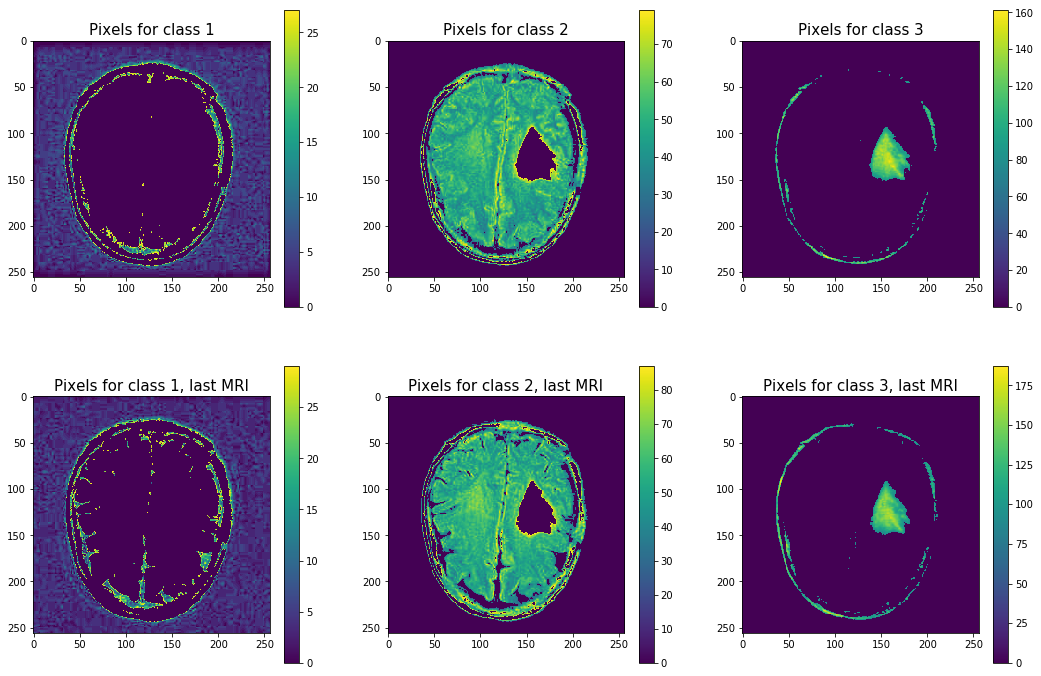

In [13]:
plt.figure(figsize=(18,12))

plt.subplot(2, 3, 1)
plt.imshow(part_1)
plt.title('Pixels for class 1', fontsize=15)
plt.colorbar()

plt.subplot(2, 3, 2)
plt.imshow(part_2)
plt.title('Pixels for class 2', fontsize=15)
plt.colorbar()

plt.subplot(2, 3, 3)
plt.imshow(part_3)
plt.title('Pixels for class 3', fontsize=15)
plt.colorbar()

plt.subplot(2, 3, 4)
plt.imshow(part_1_last)
plt.title('Pixels for class 1, last MRI', fontsize=15)
plt.colorbar()

plt.subplot(2, 3, 5)
plt.imshow(part_2_last)
plt.title('Pixels for class 2, last MRI', fontsize=15)
plt.colorbar()

plt.subplot(2, 3, 6)
plt.imshow(part_3_last)
plt.title('Pixels for class 3, last MRI', fontsize=15)
plt.colorbar()

plt.show()

## Binarization of the output in oder to label the images accordingly

In [14]:
IRMcoupe17_t1_Binarized = np.zeros(IRMcoupe17_t1.shape)
IRMcoupe17_t2_Binarized = np.zeros(IRMcoupe17_t2.shape)

IRMcoupe17_t1_Binarized[part_3 > 0]      = 1
IRMcoupe17_t2_Binarized[part_3_last > 0] = 1

## Tumor extraction using labeling from part 3 images,  computing growth factor

In [15]:
# Doing the labeling
IRMcoupe17_t1_Labeled = measure.label(IRMcoupe17_t1_Binarized)
IRMcoupe17_t2_Labeled = measure.label(IRMcoupe17_t2_Binarized)

# Here we assume that the tumor is the second element
# in term of area after the background ...

# Getting the label of tumor first IRM
count = Counter(IRMcoupe17_t1_Labeled.ravel())
tumor1_label, _ = count.most_common(2)[1]

# Getting the label of tumor second IRM
count = Counter(IRMcoupe17_t2_Labeled.ravel())
tumor2_label, _ = count.most_common(2)[1]

# Initializing tumor images
Tumor1 = np.zeros(IRMcoupe17_t1.shape)
Tumor2 = np.zeros(IRMcoupe17_t1.shape)

Tumor1[IRMcoupe17_t1_Labeled == tumor1_label] = 1
Tumor2[IRMcoupe17_t2_Labeled == tumor2_label] = 1
        

# Computing thze growth factor ...
TumorSizeBefore = np.sum(Tumor1)
TumorSizeAfter  = np.sum(Tumor2)

growthFactor = 100*(TumorSizeAfter - TumorSizeBefore)/TumorSizeBefore

# Adding the countour of the tumor ...
IRMcoupe17_t1_Diagnose = IRMcoupe17_t1.copy()
IRMcoupe17_t2_Diagnose = IRMcoupe17_t2.copy()

# Finding the tumor contour
for i, j in measure.find_contours(Tumor1, level=0)[0]:
    IRMcoupe17_t1_Diagnose[int(i)][int(j)] = 200

for i, j in measure.find_contours(Tumor2, level=0)[0]:
    IRMcoupe17_t2_Diagnose[int(i)][int(j)] = 200

## Visualization

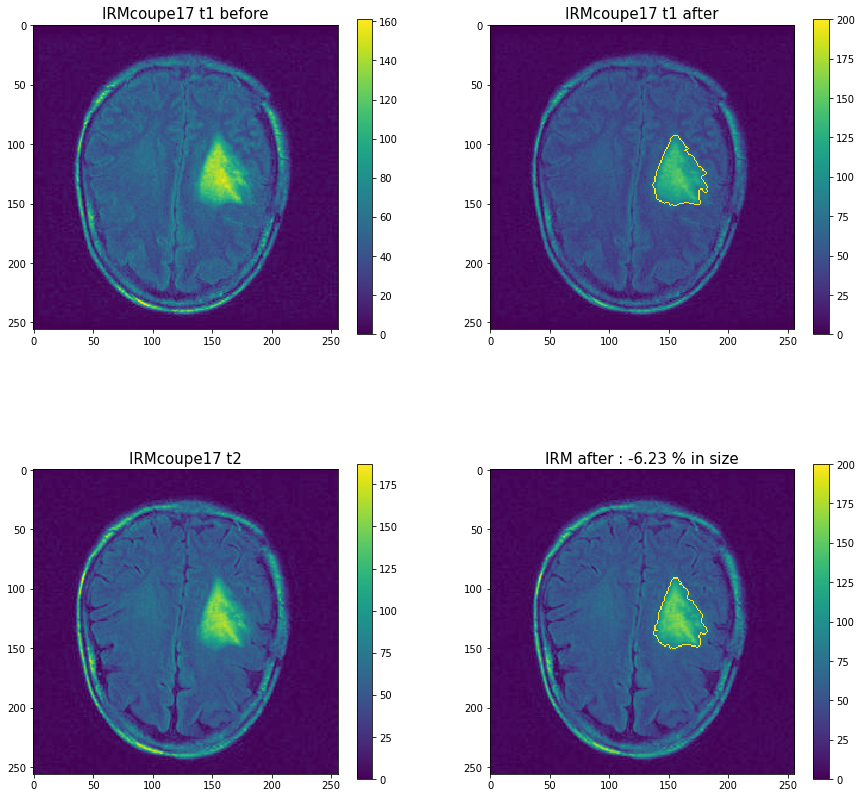

In [16]:
plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
plt.imshow(IRMcoupe17_t1)
plt.title('IRMcoupe17 t1 before', fontsize=15)
plt.colorbar(shrink=0.85)

plt.subplot(2, 2, 2)
plt.imshow(IRMcoupe17_t1_Diagnose)
plt.title('IRMcoupe17 t1 after', fontsize=15)
plt.colorbar(shrink=0.85)


plt.subplot(2, 2, 3)
plt.imshow(IRMcoupe17_t2)
plt.title('IRMcoupe17 t2', fontsize=15)
plt.colorbar(shrink=0.85)

plt.subplot(2, 2, 4)
plt.imshow(IRMcoupe17_t2_Diagnose)
plt.title('IRM after : {0:.2f} % in size'.format(growthFactor), fontsize=15)
plt.colorbar(shrink=0.85)

plt.show()